In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import *
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

* Group --> Class
* Age --> Age
* EDUC --> Years of Education
* SES --> Socioeconomic Status / 1-5
* MMSE --> Mini Mental State Examination
* CDR --> Clinical Dementia Rating
* eTIV --> Estimated total intracranial volume
* nWBV --> Normalize Whole Brain Volume
* ASF --> Atlas Scaling Factor

# DATA

In [95]:
AlzheimerData = pd.read_csv("../input/alzheimer-features/alzheimer.csv")
data = AlzheimerData.copy() # for VISUALIZATION
data["Group"] = pd.Categorical(data["Group"])
data["M/F"] = pd.Categorical(data["M/F"])
data["SES"] = pd.Categorical(data["SES"])
data["CDR"] = pd.Categorical(data["CDR"])
data["EDUC"] = pd.Categorical(data["EDUC"])
data["Age"] = pd.Categorical(data["Age"])

df = data.select_dtypes(include=["float64","int64","int32"])

# INFORMATIONS

In [113]:
print(data.shape)
print("-."*40)
print(data.columns)
print("-."*40)
print(data.info())
print("-."*40)
print(data.describe().T)
print("-."*40)
print(data.groupby(["Group","SES"])["MMSE"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["eTIV"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["nWBV"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["ASF"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["MMSE"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["eTIV"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["nWBV"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["ASF"].mean())
print("-."*40)
print(data["Group"].value_counts())
print("-."*40)
print(data["EDUC"].value_counts())
print("-."*40)
print(data["M/F"].value_counts())
print("-."*40)
print(df.corr())
print("-."*40)
print(data.isnull().sum())
print("-."*40)

(373, 10)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB
None
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
       count         mean    

# MISSING VALUES VISUALIZATION

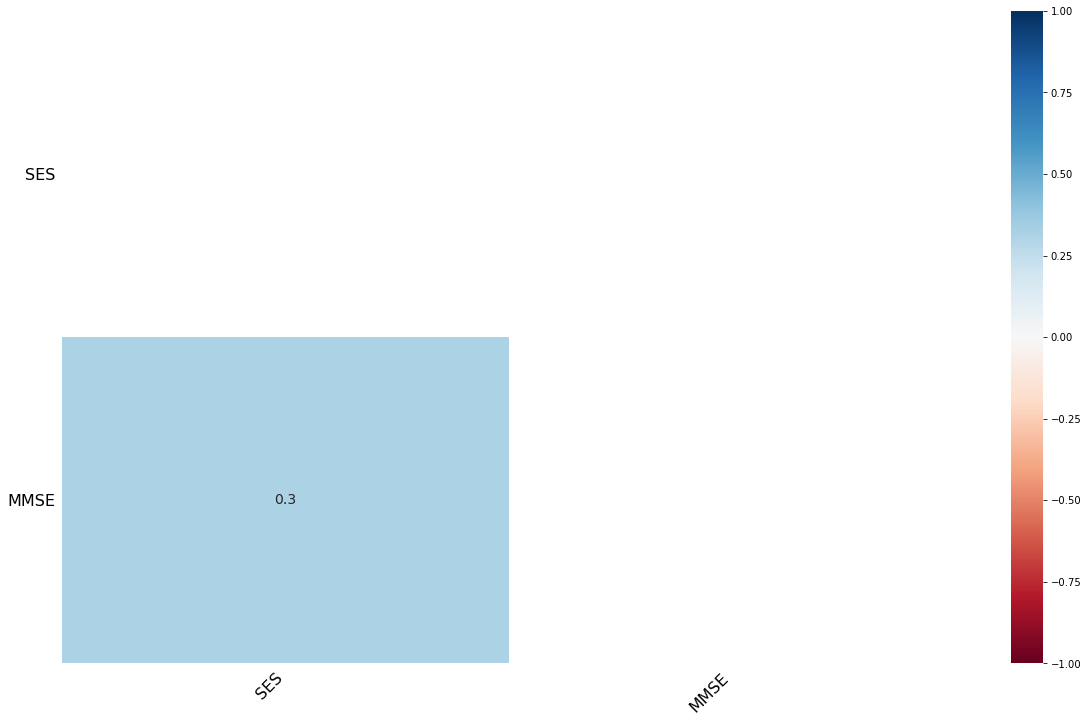

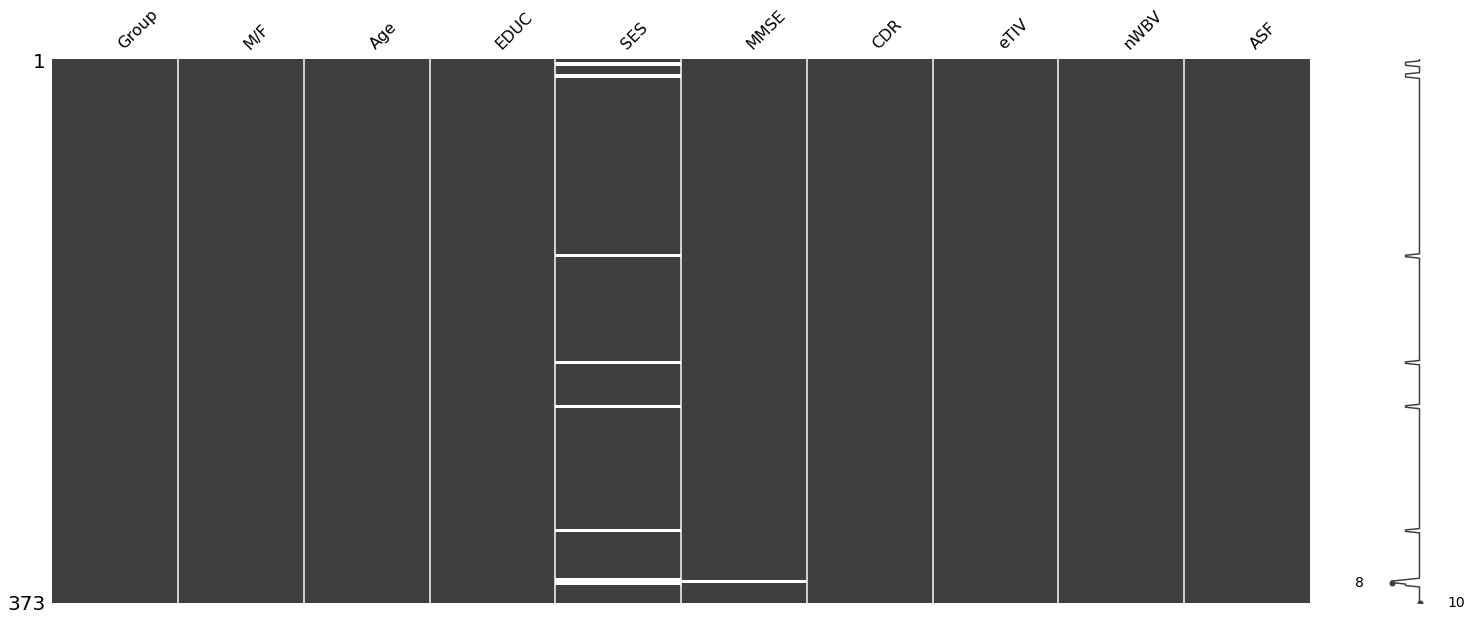

In [22]:
msno.heatmap(data)
msno.matrix(data)
plt.show()

# VISUALIZATION

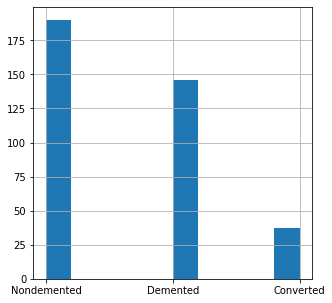

In [30]:
data["Group"].hist(figsize=(5,5))
plt.show()

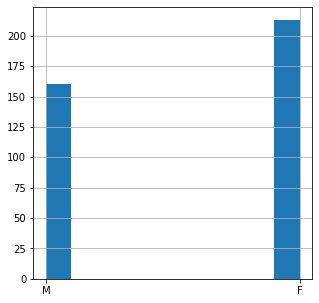

In [31]:
data["M/F"].hist(figsize=(5,5))
plt.show()

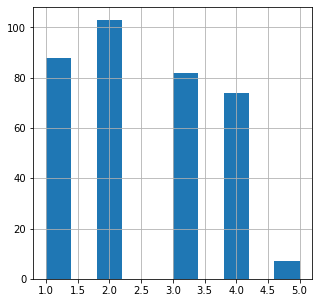

In [32]:
data["SES"].hist(figsize=(5,5))
plt.show()

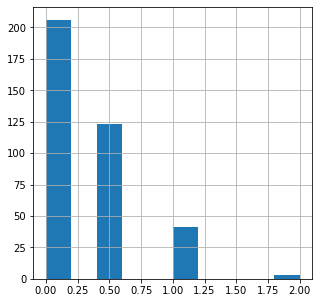

In [34]:
data["CDR"].hist(figsize=(5,5))
plt.show()

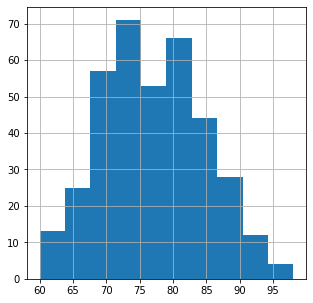

In [35]:
data["Age"].hist(figsize=(5,5))
plt.show()

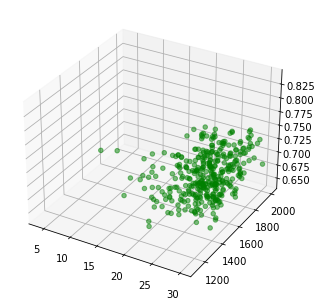

In [46]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data["MMSE"], data["eTIV"], data["nWBV"], c="green", s=20, alpha=0.5)
plt.show()

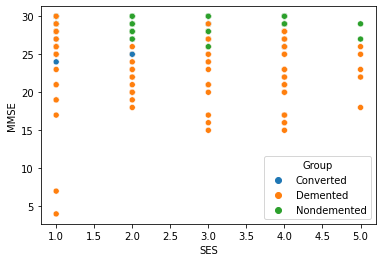

In [51]:
sns.scatterplot(x="SES",y="MMSE",hue="Group",data=data)
plt.show()

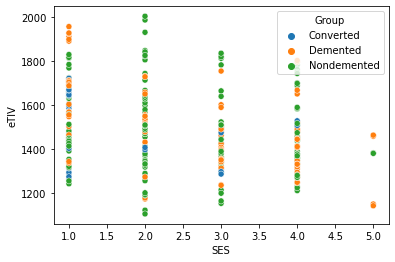

In [52]:
sns.scatterplot(x="SES",y="eTIV",hue="Group",data=data)
plt.show()

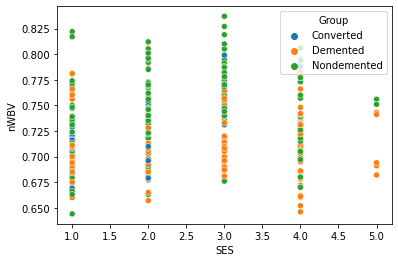

In [53]:
sns.scatterplot(x="SES",y="nWBV",hue="Group",data=data)
plt.show()

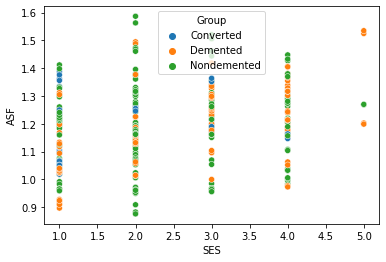

In [54]:
sns.scatterplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


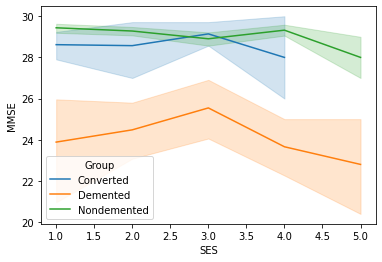

In [58]:
sns.lineplot(x="SES", y="MMSE",hue="Group", data=data)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


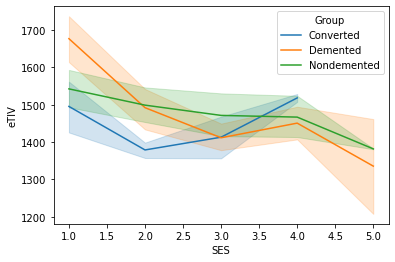

In [59]:
sns.lineplot(x="SES", y="eTIV",hue="Group", data=data)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


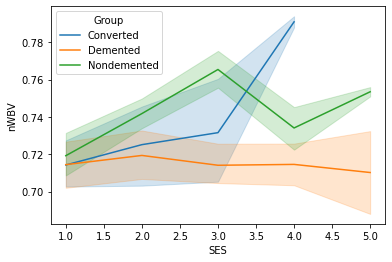

In [60]:
sns.lineplot(x="SES", y="nWBV",hue="Group", data=data)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


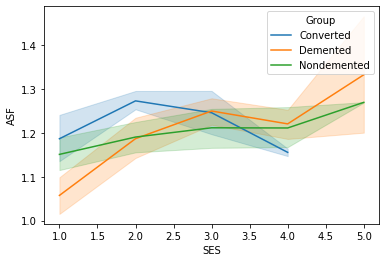

In [61]:
sns.lineplot(x="SES", y="ASF",hue="Group", data=data)
plt.show()

# CORRELATION VISUALIZATION

In [62]:
Features = ["MMSE","eTIV","nWBV","ASF"]

In [63]:
corrPearson = data[Features].corr(method="pearson")
corrSpearman = data[Features].corr(method="spearman")

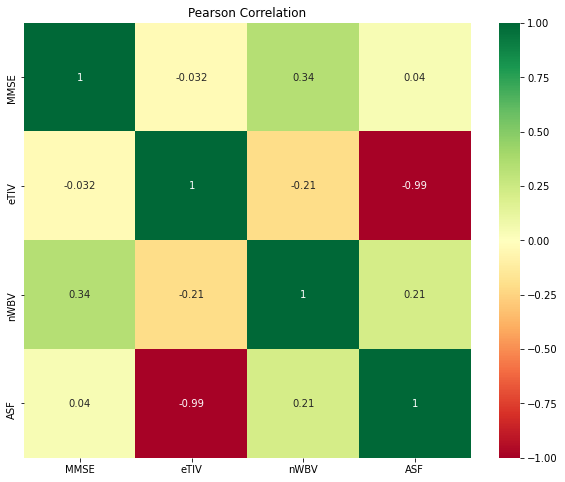

In [65]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

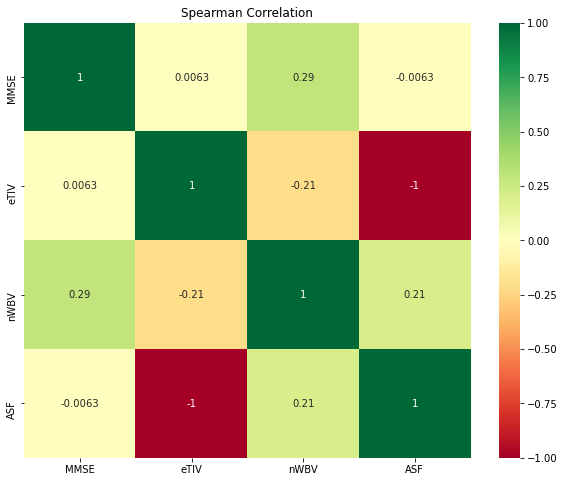

In [66]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Spearman Correlation")
plt.show()

# NORMALITY

In [82]:
for i in Features:
    print(i,"-----------")
    print(shapiro(data[i]))

MMSE -----------
ShapiroResult(statistic=nan, pvalue=1.0)
eTIV -----------
ShapiroResult(statistic=0.9752796292304993, pvalue=5.41061490366701e-06)
nWBV -----------
ShapiroResult(statistic=0.9912242889404297, pvalue=0.025958186015486717)
ASF -----------
ShapiroResult(statistic=0.9913418889045715, pvalue=0.027948981150984764)


# HOMOGENEITY

In [84]:
print(levene(data["MMSE"],data["eTIV"],data["nWBV"],data["ASF"]))

LeveneResult(statistic=nan, pvalue=nan)


# CONVERSION

In [120]:
Columns = ["Group","M/F"]
encode = LabelEncoder()
for i in Columns:
    print(data[i].value_counts())
    print("----")
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())
    print("----"*30)

2    190
1    146
0     37
Name: Group, dtype: int64
----
2    190
1    146
0     37
Name: Group, dtype: int64
------------------------------------------------------------------------------------------------------------------------
0    213
1    160
Name: M/F, dtype: int64
----
0    213
1    160
Name: M/F, dtype: int64
------------------------------------------------------------------------------------------------------------------------


#Group
* Converted (0)
* Demented (1)
* Nondemented (2)

#M/F
* F (0)
* M (1)

In [121]:
data["SES"] = AlzheimerData["SES"]
data["CDR"] = AlzheimerData["CDR"]
data["EDUC"] = AlzheimerData["EDUC"]
data["Age"] = AlzheimerData["Age"]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB
None


# AGAINIST VALUES

In [103]:
DataForA = data.dropna()
clf = LocalOutlierFactor()
clf.fit_predict(DataForA)

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [105]:
score = clf.negative_outlier_factor_
scoreSort = np.sort(score)
print(scoreSort[0:50])

[-2.70017445 -2.50439642 -2.20093474 -1.93853532 -1.91984965 -1.89075225
 -1.8667096  -1.74605898 -1.68895259 -1.60649568 -1.522452   -1.51601479
 -1.46042995 -1.4372591  -1.3778519  -1.35936656 -1.32713812 -1.30151513
 -1.25490057 -1.23974552 -1.21059183 -1.20632036 -1.20531193 -1.20115039
 -1.20026163 -1.19672014 -1.18684683 -1.18590315 -1.18434513 -1.17996875
 -1.16938181 -1.16906995 -1.16849182 -1.16286579 -1.15761629 -1.15617911
 -1.15350886 -1.15261062 -1.1519687  -1.14815872 -1.14693053 -1.14524279
 -1.14173555 -1.14109065 -1.13840401 -1.13723536 -1.13437463 -1.13412061
 -1.1316204  -1.12181113]


In [106]:
point = scoreSort[3]
print(DataForA[score == point])

     Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
167      2    1   73    16  2.0  29.0  0.0  1931  0.722  0.909


In [112]:
againstvalues = DataForA < point
print(DataForA[againstvalues])

     Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV  nWBV  ASF
0      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
1      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
5      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
6      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
7      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
..     ...  ...  ...   ...  ...   ...  ...   ...   ...  ...
368    NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
369    NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
370    NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
371    NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN
372    NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  NaN

[354 rows x 10 columns]


In [109]:
normalvalues = DataForA > point
print(data[normalvalues])

     Group  M/F   Age  EDUC  SES  MMSE  CDR    eTIV   nWBV    ASF
0      2.0  1.0  87.0  14.0  2.0  27.0  0.0  1987.0  0.696  0.883
1      2.0  1.0  88.0  14.0  2.0  30.0  0.0  2004.0  0.681  0.876
2      NaN  NaN   NaN   NaN  NaN   NaN  NaN     NaN    NaN    NaN
3      NaN  NaN   NaN   NaN  NaN   NaN  NaN     NaN    NaN    NaN
4      NaN  NaN   NaN   NaN  NaN   NaN  NaN     NaN    NaN    NaN
..     ...  ...   ...   ...  ...   ...  ...     ...    ...    ...
368    1.0  1.0  82.0  16.0  1.0  28.0  0.5  1693.0  0.694  1.037
369    1.0  1.0  86.0  16.0  1.0  26.0  0.5  1688.0  0.675  1.040
370    2.0  0.0  61.0  13.0  2.0  30.0  0.0  1319.0  0.801  1.331
371    2.0  0.0  63.0  13.0  2.0  30.0  0.0  1327.0  0.796  1.323
372    2.0  0.0  65.0  13.0  2.0  30.0  0.0  1333.0  0.801  1.317

[373 rows x 10 columns]


# MISSING VALUES PROCESS

In [127]:
data["SES"].fillna(data["SES"].mean(), inplace=True)
data["MMSE"].fillna(data["MMSE"].mean(), inplace=True)
print(data.isnull().sum())

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


# X & Y FOR MODELS

In [128]:
x = data.drop("Group",axis=1)
y = data["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.20,random_state=42)


# OLS MODELS & ERROR & TUNING & PREDICT

In [129]:
ols = sm.OLS(yTrain,xTrain).fit()
predict = ols.predict(xTest)
print(ols.summary())
# R2 -- 0.89

                                 OLS Regression Results                                
Dep. Variable:                  Group   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              295.9
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                   3.33e-140
Time:                        14:30:06   Log-Likelihood:                         -213.31
No. Observations:                 298   AIC:                                      444.6
Df Residuals:                     289   BIC:                                      477.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# LINEAR MODELS & ERROR & TUNING & PREDICT

In [139]:
lm = LinearRegression().fit(xTrain,yTrain)
predict = lm.predict(xTest)

R2CV = cross_val_score(lm,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.13
errorCV = -cross_val_score(lm,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

0.13704342930993535
0.6330530761745797


# PCR MODELS & ERROR & TUNING & PREDICT

In [140]:
pca = PCA()
xRTrain = pca.fit_transform(scale(xTrain))

lm = LinearRegression().fit(xRTrain,yTrain)
predict = lm.predict(xTest)

R2CV = cross_val_score(lm,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.13
errorCV = -cross_val_score(lm,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

0.13704342930993535
0.6330530761745797


# PLS MODELS & ERROR & TUNING & PREDICT

In [141]:
pls = PLSRegression().fit(xTrain,yTrain)
predict = pls.predict(xTest)

R2CV = cross_val_score(pls,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.13
errorCV = -cross_val_score(pls,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

for i in range(1,20):
    plstuned = PLSRegression(n_components=i).fit(xTrain,yTrain)
    print(f"{i}","--"*20)
    predicttuned = plstuned.predict(xTest)
    R2CVtuned = cross_val_score(plstuned,xTest,yTest,cv=10,scoring="r2").mean()
    print(R2CVtuned)
    # BEST IS 6 -- 0.15
    errorCVtuned = -cross_val_score(plstuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(np.sqrt(errorCVtuned))
    

0.12181991794526403
0.6422912190895619
1 ----------------------------------------
0.07542661166562423
0.6661382135013303
2 ----------------------------------------
0.12181991794526403
0.6422912190895619
3 ----------------------------------------
0.0992213444730959
0.649213584513216
4 ----------------------------------------
0.14573106222193546
0.6342314735089142
5 ----------------------------------------
0.1510766158660883
0.633017813236046
6 ----------------------------------------
0.15178454908510183
0.6316115967119204
7 ----------------------------------------
0.14002819691648927
0.6336076310789892
8 ----------------------------------------
0.13577216730160613
0.6334685954931933
9 ----------------------------------------
0.13704342930993643
0.6330530761745794
10 ----------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(10) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(10) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(10) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(10) should be in [1, n_features].n_components=9 wi

0.13704342930993643
0.6330530761745794
11 ----------------------------------------
0.13704342930993643


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(11) should be in [1, n_features].n_components=9 wi

0.6330530761745794
12 ----------------------------------------
0.13704342930993643
0.6330530761745794
13 ----------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=9 wi

0.13704342930993643
0.6330530761745794
14 ----------------------------------------
0.13704342930993643


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_components=9 wi

0.6330530761745794
15 ----------------------------------------
0.13704342930993643
0.6330530761745794
16 ----------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(15) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(16) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(16) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(16) should be in [1, n_features].n_components=9 wi

0.13704342930993643
0.6330530761745794
17 ----------------------------------------
0.13704342930993643


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(17) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(17) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(17) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(17) should be in [1, n_features].n_components=9 wi

0.6330530761745794
18 ----------------------------------------
0.13704342930993643
0.6330530761745794
19 ----------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(18) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(18) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(18) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(18) should be in [1, n_features].n_components=9 wi

0.13704342930993643
0.6330530761745794


/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(19) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(19) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(19) should be in [1, n_features].n_components=9 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:191: FutureWarning: As of version 0.24, n_components(19) should be in [1, n_features].n_components=9 wi

# RIDGE MODELS & ERROR & TUNING & PREDICT

In [149]:
ridge = Ridge().fit(xTrain,yTrain)
predict = ridge.predict(xTest)

R2CV = cross_val_score(ridge,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(ridge,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

alpha = np.random.uniform(0.1,10,50)

cv = RidgeCV(alphas=alpha,scoring="r2",cv=10,normalize=True).fit(xTrain,yTrain)
print(cv.alpha_)

ridgetuned = Ridge(alpha=cv.alpha_).fit(xTrain,yTrain)
R2CVtuned = cross_val_score(ridgetuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.15
errorCVtuned = -cross_val_score(ridgetuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.14793401929496489
0.6338874409081373
0.2708156517435024
0.15632593503806064
0.6321254813138356


# LASSO MODELS & ERROR & TUNING & PREDICT

In [152]:
lasso = Lasso().fit(xTrain,yTrain)
predict = lasso.predict(xTest)

R2CV = cross_val_score(lasso,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(lasso,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

cv = LassoCV(alphas=None,max_iter=100000,normalize=True).fit(xTrain,yTrain)
print(cv.alpha_)

lassotuned = Lasso(alpha=cv.alpha_,normalize=True).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lassotuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.14
errorCVtuned = -cross_val_score(lassotuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

-0.07677552446516128
0.7012493845836167
0.00028669561114749395
0.14425364921973172
0.6332053185482989


# ENET MODELS & ERROR & TUNING & PREDICT

In [154]:
elastic = ElasticNet().fit(xTrain,yTrain)
predict = elastic.predict(xTest)

R2CV = cross_val_score(elastic,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(elastic,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

cv = ElasticNetCV(alphas=None,random_state=0).fit(xTrain,yTrain)
print(cv.alpha_)

elastictuned = ElasticNet(alpha=cv.alpha_).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(elastictuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.15
errorCVtuned = -cross_val_score(elastictuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

-0.07514778416248277
0.7022053076267346
0.002707429436451467
0.15327636397286099
0.6336365203191205


# KNN MODELS & ERROR & TUNING & PREDICT

In [157]:
knn = KNeighborsRegressor().fit(xTrain,yTrain)
predict = knn.predict(xTest)

R2CV = cross_val_score(knn,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(knn,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

neighbor = {"n_neighbors":np.arange(1,10)}

cv = GridSearchCV(knn,neighbor,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
# 7

knntuned = KNeighborsRegressor(n_neighbors=7).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(knntuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# -0.15
errorCVtuned = -cross_val_score(knntuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

-0.19733753501400567
0.6913237819058241
{'n_neighbors': 7}
-0.1580889498656605
0.6898630869362421


# ARTIFICIAL NEURAL NETWORKS MODELS & ERROR & TUNING & PREDICT

In [160]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)

mlp = MLPRegressor().fit(xRTrain,yTrain)
predict = mlp.predict(xTest)

R2CV = cross_val_score(mlp,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(mlp,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"alpha":[0.0001,0.001,0.01,0.1,0.2],
         "hidden_layer_sizes": [(20,20),(100,200,150),(300,200,250)],
         "activation": ["relu","logistic"]}

# cv = GridSearchCV(mlp,params,cv=10,verbose=False,n_jobs=-1).fit(xRTrain,yTrain)
# print(cv.best_params_)
# {'activation': 'relu', 'alpha': 0.2, 'hidden_layer_sizes': (300, 200, 250)}

mlptuned = MLPRegressor(activation="relu",alpha=0.2,hidden_layer_sizes=(300,200,250))

R2CVtuned = cross_val_score(mlptuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# -83
errorCVtuned = -cross_val_score(mlptuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-2201.3772279316554


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


35.208169787410284
-83.97450063887301


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20.135467923242064


# REGRESSION TREES(CART) MODELS & ERROR & TUNING & PREDICT

In [164]:
cart = DecisionTreeRegressor().fit(xTrain,yTrain)
predict = cart.predict(xTest)

R2CV = cross_val_score(cart,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
errorCV = -cross_val_score(cart,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"min_samples_split":range(2,100),
         "max_leaf_nodes":range(2,10)}


# cv = GridSearchCV(cart,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'max_leaf_nodes': 2, 'min_samples_split': 2}

carttuned = DecisionTreeRegressor(max_leaf_nodes=2,min_samples_split=2).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(carttuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.19
errorCVtuned = -cross_val_score(carttuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))


-0.19278711484593838
0.808437646681195
0.19153366081015022
0.6428906621126202


# BAGGING MODELS & ERROR & TUNING & PREDICT

In [170]:
bagg = BaggingRegressor(random_state=42,bootstrap_features=True).fit(xTrain,yTrain)
predict = bagg.predict(xTest)

R2CV = cross_val_score(bagg,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.14
errorCV = -cross_val_score(bagg,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

estimators = {"n_estimators": range(2,30)}

# cv = GridSearchCV(bagg,estimators,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'n_estimators': 9}

baggtuned = BaggingRegressor(bootstrap_features=True,random_state=42, n_estimators=9).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(baggtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.10
errorCVtuned = -cross_val_score(baggtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.14289320728291316
0.6390003353453179
0.10272071791679627
0.6563856729663476


# RANDOM FORESTS (RF) MODELS & ERROR & TUNING & PREDICT

In [173]:
rf = RandomForestRegressor().fit(xTrain,yTrain)
predict = rf.predict(xTest)

R2CV = cross_val_score(rf,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.15
errorCV = -cross_val_score(rf,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"max_depth":range(1,20),
         "max_features":[3,5,10,15, 20],
         "n_estimators": [200,300,500,1000,2000]}

# cv = GridSearchCV(rf,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'max_depth': 14, 'max_features': 3, 'n_estimators': 300}

frtuned = RandomForestRegressor(max_depth=14,max_features=3,n_estimators=300).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(frtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.20
errorCVtuned = -cross_val_score(frtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.15338001400560225
0.6401800806915862
0.2074450626361656
0.6081071171043929


# GRADIENT BOOSTING MACHINES (GBM) MODELS & ERROR & TUNING & PREDICT

In [176]:
gbm = GradientBoostingRegressor().fit(xTrain,yTrain)
predict = gbm.predict(xTest)

R2CV = cross_val_score(gbm,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.05
errorCV = -cross_val_score(gbm,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"learning_rate": [0.001, 0.01, 0.1, 0.2],
          "max_depth": [3, 5, 8, 10],
          "n_estimators": [200, 300, 500, 1000, 2000],
          "subsample": [1, 0.5, 0.75]}

# cv = GridSearchCV(gbm,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

gbmtuned = GradientBoostingRegressor(learning_rate=0.01,max_depth=3,
                                     n_estimators=200,subsample=0.5).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(gbmtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.23
errorCVtuned = -cross_val_score(gbmtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.05048775602048202
0.6582176560359371
0.23824647775561436
0.61713566959594


# EXTREME GRADIENT BOOSTING (XGBOOST) MODELS & ERROR & TUNING & PREDICT

In [179]:
xgb = XGBRegressor().fit(xTrain,yTrain)
predict = xgb.predict(xTest)

R2CV = cross_val_score(xgb,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.15
errorCV = -cross_val_score(xgb,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"colsample_bytree": [0.4, 0.5, 0.6, 0.9, 1],
          "n_estimators": [100, 200, 500, 1000],
          "max_depth": [2, 3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.5]}

# cv = GridSearchCV(xgb,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'colsample_bytree': 0.9}

xgbtuned = XGBRegressor(colsample_bytree=0.9,
                        n_estimators=100, learning_rate=0.1, max_depth=2).fit(xTrain, yTrain)

R2CVtuned = cross_val_score(xgbtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.14
errorCVtuned = -cross_val_score(xgbtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))


0.07909294078476789
0.6553111553056333
0.14821842224731074
0.616744522289976


# LIGHT GRADIENT BOOSTING (lIGHT GBM) MODELS & ERROR & TUNING & PREDICT

In [182]:
lgbm = LGBMRegressor().fit(xTrain,yTrain)
predict = lgbm.predict(xTest)

R2CV = cross_val_score(lgbm,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.16
errorCV = -cross_val_score(lgbm,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [2, 3, 4, 5, 6],
    "learning_rate": [0.1, 0.01, 0.5]
}


# cv = GridSearchCV(lgbm,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}

lgbmtuned = LGBMRegressor(learning_rate=0.01,max_depth=2,n_estimators=200).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lgbmtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.19
errorCVtuned = -cross_val_score(lgbmtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.16160823899988444
0.6370423641229344
0.196650325909758
0.6284334109088309


# CATEGORY BOOSTING (CATBOOST) MODELS & ERROR & TUNING & PREDICT

In [187]:
catb = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)
predict = catb.predict(xTest)

R2CV = cross_val_score(catb,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
# 0.06
errorCV = -cross_val_score(catb,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCV))

params = {"depth": [2,3,4,5,6,7],
         "learning_rate": [0.1,0.01,0.001,0.5]}

# cv = GridSearchCV(catb,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'depth': 4, 'learning_rate': 0.01}

catbtuned = CatBoostRegressor(verbose=False,depth=4,learning_rate=0.01).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(catbtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
# 0.20
errorCVtuned = -cross_val_score(catbtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorCVtuned))

0.06669505480489114
0.6606324519261452
0.20422827904598062
0.6108503795945837


# COMPARISON REGRESSOR

----------------------------
LinearRegression: 
Accuracy: -285337.3037571285
----------------------------
PLSRegression: 
Accuracy: 0.15334424156059645
----------------------------
Ridge: 
Accuracy: 0.18000458518309592
----------------------------
ElasticNet: 
Accuracy: 0.1764679912377135
----------------------------
KNeighborsRegressor: 
Accuracy: 0.03676988036593942
----------------------------
MLPRegressor: 
Accuracy: -294057.17678991857
----------------------------
DecisionTreeRegressor: 
Accuracy: 0.11796847545985889
----------------------------
BaggingRegressor: 
Accuracy: 0.3561422413793104
----------------------------
RandomForestRegressor: 
Accuracy: 0.32489192334171446
----------------------------
GradientBoostingRegressor: 
Accuracy: 0.2043350890830451
----------------------------
XGBRegressor: 
Accuracy: 0.21059580623589047
----------------------------
LGBMRegressor: 
Accuracy: 0.1863752978567651
----------------------------
CatBoostRegressor: 
Accuracy: 0.3688549770492915


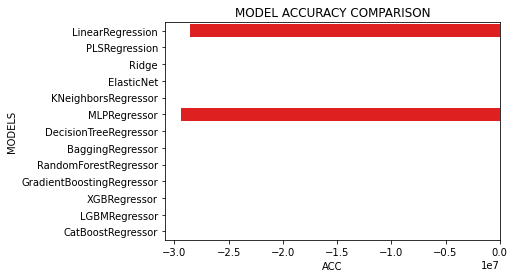

In [234]:
models = [lm,pls,ridgetuned,elastictuned,knntuned,mlp,
          carttuned,bagg,frtuned,gbmtuned,xgb,lgbmtuned,catbtuned]


for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = r2_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    

# REGRESSOR MODELS FOR TRAIN

In [236]:
models = [lm,pls,ridgetuned,elastictuned,knntuned,mlp,
          carttuned,bagg,frtuned,gbmtuned,xgb,lgbmtuned,catbtuned]

for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTrain)
    accuracy = r2_score(yTrain, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    

----------------------------
LinearRegression: 
Accuracy: -343784.86496235296
----------------------------
PLSRegression: 
Accuracy: 0.37992020995609055
----------------------------
Ridge: 
Accuracy: 0.41851016478153535
----------------------------
ElasticNet: 
Accuracy: 0.4147165981888107
----------------------------
KNeighborsRegressor: 
Accuracy: 0.2747496988530227
----------------------------
MLPRegressor: 
Accuracy: -352587.2878266495
----------------------------
DecisionTreeRegressor: 
Accuracy: 0.5786891711975652
----------------------------
BaggingRegressor: 
Accuracy: 0.8899158231156734
----------------------------
RandomForestRegressor: 
Accuracy: 0.9434356434266883
----------------------------
GradientBoostingRegressor: 
Accuracy: 0.7231200229026293
----------------------------
XGBRegressor: 
Accuracy: 0.9999929452257352
----------------------------
LGBMRegressor: 
Accuracy: 0.6053501261190718
----------------------------
CatBoostRegressor: 
Accuracy: 0.8372258079310201


# LOGISTIC REGRESSION MODELS & ERROR & TUNING & PREDICT

In [189]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
predict = lj.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(lj,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.82
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.84
0.8285714285714285
0.7483314773547883


# GAUSSIAN NAIVE BAYES MODELS & ERROR & TUNING & PREDICT

In [190]:
gnb = GaussianNB().fit(xTrain,yTrain)
predict = gnb.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(gnb,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.82
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.8533333333333334
0.8267857142857142
0.6831300510639732


# KNN MODELS & ERROR & TUNING & PREDICT

In [194]:
kn = KNeighborsClassifier().fit(xTrain,yTrain)
predict = kn.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(kn,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.43
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"n_neighbors": np.arange(1,50)}

# cv = GridSearchCV(kn,params,cv=10).fit(xTrain,yTrain)
# print(cv.best_params_)
# print(cv.best_score_)
# 'n_neighbors': 1

kntuned = KNeighborsClassifier(n_neighbors=1).fit(xTrain,yTrain)
predicttuned = kntuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(kntuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.65
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.6266666666666667
0.4303571428571429
0.7571877794400365
0.6533333333333333
0.5142857142857142
0.8406346808612327


# NEURAL NETWORKS CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [201]:
scaler = StandardScaler().fit(xTrain, yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
# 0.79
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"alpha": [0.01,0.02,0.005,0.001,0.0001],
         "hidden_layer_sizes": [(3,5),(5,3),(10,10,10),(100,200,150),(100,100,100)],
         "solver": ["lbfgs","adam","sgd"],
         "activation": ["relu","logistic"]}

# cv = GridSearchCV(mlpc,params,cv=10,verbose=False,n_jobs=-1).fit(xRTrain,yTrain)
# print(cv.best_params_)

mlpctuned = MLPClassifier(alpha=0.1,solver="adam",
                          activation="relu",hidden_layer_sizes=(100,100,100)).fit(xRTrain,yTrain)

predicttuned = mlpctuned.predict(xRTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(mlpctuned,xRTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.72
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8666666666666667


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8017857142857142
0.6733003292241385


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8933333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7214285714285713
0.5887840577551898


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# REGRESSION CLASSIFIER TREES(CART) MODELS & ERROR & TUNING & PREDICT

In [207]:
cartc = DecisionTreeClassifier().fit(xTrain,yTrain)
predict = cartc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(cartc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.74
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"max_depth":range(1,20),
         "min_samples_split":range(2,50)}

# cv = GridSearchCV(cartc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)
# {'max_depth': 1, 'min_samples_split': 2}

cartctuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(xTrain,yTrain)
predicttuned = cartctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(cartctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.8666666666666667
0.7499999999999999
0.6429100507328637
0.84
0.8392857142857142
0.6928203230275509


# RANDOM FOREST CLASSIFIER (RF) MODELS & ERROR & TUNING & PREDICT

In [210]:
rfc = RandomForestClassifier(random_state=42).fit(xTrain,yTrain)
predict = rfc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(rfc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.81
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}

# cv = GridSearchCV(rfc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

rfctuned = RandomForestClassifier(max_depth=10, max_features=8,
                                      min_samples_split=10, n_estimators=1000).fit(xTrain, yTrain)

predicttuned = rfctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(rfctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.8666666666666667
0.8125
0.6110100926607787
0.84
0.8392857142857142
0.6928203230275509


# GBM CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [214]:
gbmc = GradientBoostingClassifier().fit(xTrain,yTrain)
predict = gbmc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(gbmc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.82
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"learning_rate": [0.001,0.01,0.1,0.05],
         "max_depth": [3,5,10],
         "n_estimators": [100,300,500,1000],
         "min_samples_split":[2,5,10]}

# cv = GridSearchCV(gbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

gbmctuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=3,
                                           min_samples_split=10, n_estimators=1000).fit(xTrain, yTrain)

predicttuned = gbmctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(gbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.81
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.84
0.8142857142857143
0.6633249580710799
0.8666666666666667
0.8178571428571427
0.5773502691896257


# XGBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [ ]:
xgbc = XGBClassifier(verbose=False).fit(xTrain,yTrain)
predict = xgbc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(xgbc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.84
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_samples_split": [2, 5, 10]}

# cv = GridSearchCV(xgbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

xgbctuned = XGBClassifier(learning_rate=0.01, max_depth=6, min_samples_split=2,
                              n_estimators=100, subsample=0.8).fit(xTrain, yTrain)

predicttuned = xgbctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(xgbctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.82
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

# LIGHTGBM CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [220]:
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
predict = lgbmc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(lgbmc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.77
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max-depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

# cv = GridSearchCV(lgbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

lgbmctuned = LGBMClassifier(learning_rate=0.01, max_depth=3, min_child_samples=20,
                           n_estimators=500, subsample=0.5).fit(xTrain, yTrain)

predicttuned = lgbmctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(lgbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.81
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.8533333333333334
0.7732142857142856
0.621825270205921
0.8533333333333334
0.8125
0.6531972647421809


# CATBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [224]:
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)
predict = catbc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(catbc,xTest,yTest,cv=10).mean()
print(R2CV)
# 0.80
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

params = {"iterations": [200, 500],
          "learning_rate": [0.01, 0.05, 0.1],
          "depth": [3, 5, 8]}

# cv = GridSearchCV(catbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# rint(cv.best_params_)

catbctuned = CatBoostClassifier(depth=5, iterations=200, learning_rate=0.05,verbose=False).fit(xTrain, yTrain)
predicttuned = catbctuned.predict(xTest)
print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(catbctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))

0.8533333333333334
0.8017857142857142
0.621825270205921
0.84
0.8392857142857142
0.6928203230275509


# COMPARISON CLASSIFIERS

----------------------------
LogisticRegression: 
Accuracy: 0.84
----------------------------
GaussianNB: 
Accuracy: 0.8533333333333334
----------------------------
KNeighborsClassifier: 
Accuracy: 0.6533333333333333
----------------------------
MLPClassifier: 
Accuracy: 0.4266666666666667
----------------------------
DecisionTreeClassifier: 
Accuracy: 0.84
----------------------------
RandomForestClassifier: 
Accuracy: 0.84
----------------------------
GradientBoostingClassifier: 
Accuracy: 0.84
----------------------------
XGBClassifier: 
Accuracy: 0.8533333333333334
----------------------------
LGBMClassifier: 
Accuracy: 0.8533333333333334
----------------------------
CatBoostClassifier: 
Accuracy: 0.84


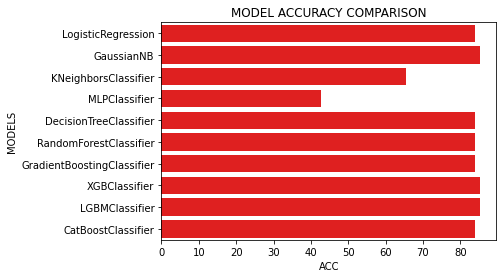

In [233]:
models = [lj,gnb,kntuned,mlpc,cartctuned,rfctuned,gbmc,xgbc,lgbmctuned,catbctuned]
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()